In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import math
from matplotlib.pylab import rcParams

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits= load_digits()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data,\
                            digits.target, test_size=0.20, random_state=0)


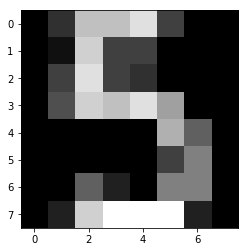

In [3]:
plt.imshow(np.reshape(x_train[1], (8,8)), cmap=plt.cm.gray)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
# train the model l1 regularization
# define the regulation strength
alphas = np.logspace(-5, 6, num = 50) 
# define number of fold
three_fold_cv = KFold(n_splits = 3)
# define the accuracies vectors
accuracies_l1 = np.zeros(len(alphas))
# loop through the alphas
for i, alpha in enumerate(alphas):
#     print(alpha)
    logreg_L1 = LogisticRegression(penalty = 'l1', C= alpha)
#     it will automatically round it for you?
    acc = 0
    # Fit each fold using the other two as training data
    for train_index, test_index in three_fold_cv.split(x_train):
        x_fold_train = x_train[train_index]
        y_fold_train = y_train[train_index]
        x_fold_test = x_train[test_index]
        y_fold_test = y_train[test_index]
            
        logreg_L1.fit(x_fold_train, y_fold_train)
        y_fold_predicted = logreg_L1.predict(x_fold_test)
        acc += accuracy_score(y_fold_test, y_fold_predicted)
    
    # Average RMSE over the 3 folds for alpha_i
    accuracies_l1[i] = acc / 3
    



In [6]:
# train the model l2 regularization
# define the regulation strength
# alphas = np.arange(1, 200, 1)
# define number of fold
three_fold_cv = KFold(n_splits = 3)
# define the accuracies vectors
accuracies_l2 = np.zeros(len(alphas))
# loop through the alphas
for i, alpha in enumerate(alphas):
    
    logreg_L2 = LogisticRegression(penalty = 'l2', C= alpha)
#     it will automatically round it for you?
    acc = 0
    # Fit each fold using the other two as training data
    for train_index, test_index in three_fold_cv.split(x_train):
        x_fold_train = x_train[train_index]
        y_fold_train = y_train[train_index]
        x_fold_test = x_train[test_index]
        y_fold_test = y_train[test_index]
            
        logreg_L2.fit(x_fold_train, y_fold_train)
        y_fold_predicted = logreg_L2.predict(x_fold_test)
        acc += accuracy_score(y_fold_test, y_fold_predicted)
    
    # Average RMSE over the 3 folds for alpha_i
    accuracies_l2[i] = acc / 3
    


In [7]:
# get the optimal for l1
optimal_alpha_l1 = alphas[np.argmax(accuracies_l1)]
logreg_L1_opt = LogisticRegression(penalty = 'l1', C= optimal_alpha_l1)
logreg_L1_opt.fit(x_train, y_train)
y_predicted_l1 = logreg_L1_opt.predict(x_test)
score_l1 = accuracy_score(y_test, y_predicted_l1)

# get the optimal for l2
optimal_alpha_l2 = alphas[np.argmax(accuracies_l2)]
logreg_L2_opt = LogisticRegression(penalty = 'l2', C= optimal_alpha_l2)
logreg_L2_opt.fit(x_train, y_train)
y_predicted_l2 = logreg_L2_opt.predict(x_test)
score_l2 = accuracy_score(y_test, y_predicted_l2)

print("optimal c for l1:", optimal_alpha_l1, "optimal c for l2", optimal_alpha_l2)

optimal c for l1: 0.065512855686 optimal c for l2 0.0232995181052


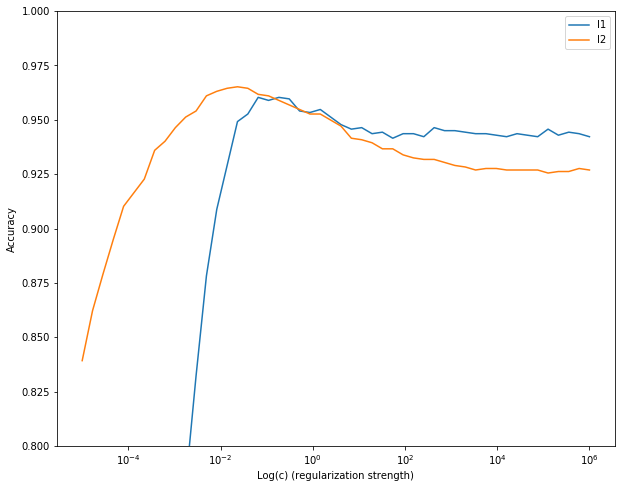

In [8]:
# draw the relation between regularization strength and the accuracy
plt.figure(figsize = (10,8))
plt.plot(alphas, accuracies_l1, label = "l1")
plt.plot(alphas, accuracies_l2, label = "l2")
plt.ylim(0.8, 1.0)
plt.xscale('log')
plt.xlabel("Log(c) (regularization strength)")
plt.ylabel("Accuracy")
plt.legend()

### Conclusion

As we see in the plot above, for l1 regularization, the peaks appears at c = 0.06. For l2 regularization, the peak appears at about c = 0.02. They are near $10^{-2}$

Therefore, I would choose c = $10^{-2}$ as the regularization strength

# Part 2

## 2.1

In [25]:
from __future__ import division, print_function,unicode_literals
import tensorflow as tf
from graph_vis import show_graph as sg

In [26]:
# Define hyperparameters and input size

n_inputs = x_train.shape[1]  # MNIST
n_outputs = 10

In [27]:
tf.reset_default_graph()

In [28]:
# Start
import tensorflow as tf
x = tf.placeholder(tf.float32,shape = [None,n_inputs])
# correct answers
y = tf.placeholder(tf.float32, shape = [None, n_outputs])
# None, because we don't specify how many examples we'll look at

W = tf.Variable(tf.zeros([n_inputs, n_outputs])) # number of weights, why is 10 here? only 1 layer?
b = tf.Variable(tf.zeros([n_outputs])) # number of bias terms

In [29]:
y_hat = tf.nn.softmax(tf.matmul(x, W) + b) 
# define what we'll take the softmax activation on

# Notice order on x and W (dimensions must match)

In [30]:
# define loss function
# Cross entropy
ce = tf.reduce_mean(-tf.reduce_sum( y* tf.log(y_hat),reduction_indices=[1]))
ce # sum over the columns to get cost for every training example

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [31]:
traininng_rate = 0.001
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(ce)

### execution 

In [32]:
sess = tf.Session()

In [33]:
sess.run(tf.global_variables_initializer())

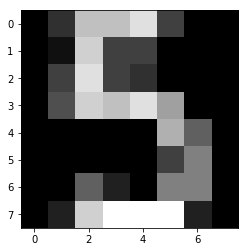

In [34]:
plt.imshow(np.reshape(x_train[1], (8,8)), cmap=plt.cm.gray)

In [35]:
# change the real value shape, say 5, to [0,0,0,0,1,0...]
def change_shape(y_trainn, y_test,n_outputs):
    y_new_train = np.zeros((y_train.shape[0],n_outputs))
    y_new_test = np.zeros((y_test.shape[0],n_outputs))
    for i,num in enumerate(y_train):
        y_new_train[i][num] = 1
    for i,num in enumerate(y_test):
        y_new_test[i][num] = 1
    
    return y_new_train, y_new_test

In [36]:
def new_batch(batch_size, x_train, y_train, iterations):
#     shuffle the index
    index = np.random.permutation(np.arange(0,len(x_train)))
#     print(index)
    x_batches = []
    y_batches = []
    x_train = x_train[index]
    y_train = y_train[index]

    for j in range(iterations):
        x_batches.append(x_train[j*batch_size: j*batch_size+batch_size])
        y_batches.append(y_train[j*batch_size: j*batch_size+batch_size])
        
#     batch_idx=index[:batch_size]
    return np.asarray(x_batches), np.asarray(y_batches)
#     return x_train[batch_idx,:] y_train[batch_idx,:]

In [37]:
# monitor accuracy    
with tf.name_scope("eval"):
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_hat,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
   # tf.summary.scalar('accuracy', accuracy)

In [38]:
train_writer1 = tf.summary.FileWriter('logs/train1', sess.graph)
test_writer1 = tf.summary.FileWriter('logs/test1')
merged = tf.summary.merge_all()

In [39]:
def run_softmax():
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

    with tf.Session() as sess:
        init.run()
        epochs = 200
        batch_size = 100
        learning_rate = 0.001
        n_outputs = 10
        acc_trains = []
        acc_vals = []

        y_new_train, y_new_test = change_shape(y_train, y_test,n_outputs)
#         x_train_sub, x_val, y_train_sub, y_val = train_test_split(x_train,\
#                                 y_new_train, test_size=0.20, random_state=0)
#         print(y_train.shape)
        for epoch in range(epochs):
    #     get the number of iterations
            iterations = x_train.shape[0] // batch_size
    #         get the batches
            x_batches, y_batches = new_batch(batch_size, x_train, y_new_train, iterations)

            for i in range(iterations):
            # get batches of training data
            # we don't show everything to the network at once
            # what is the batch here?
                x_batch, y_batch = x_batches[i], y_batches[i]
        #         print(batch_xs)
#                 print(x_batch.shape, y_batch.shape)
                sess.run(train_step, feed_dict={x: x_batch, y: y_batch})
            acc_train = accuracy.eval(feed_dict={x: x_train, y: y_new_train})
            acc_val = accuracy.eval(feed_dict={x: x_test, y: y_new_test})
#             acc_train = acc(x_batch, y_batch)
#             acc_val = acc(x_val, y_val)
#             print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

            acc_trains.append(acc_train)
            acc_vals.append(acc_val)
#         tensor board recording
            train_summary = tf.Summary()
            train_summary.value.add(tag='Training accuracy', simple_value=acc_train)
            train_writer1.add_summary(train_summary, epoch)
            train_writer1.flush()
            test_summary = tf.Summary()
            test_summary.value.add(tag='Validation accuracy', simple_value=acc_val)
            test_writer1.add_summary(test_summary, epoch)
            test_writer1.flush()
            #train_writer1.add_summary(acc_train, epoch)
            #test_writer1.add_summary(acc_val, epoch)
    return acc_trains, acc_vals

In [40]:
acc_trains, acc_vals = run_softmax()

### Accuracy plot and the network graph

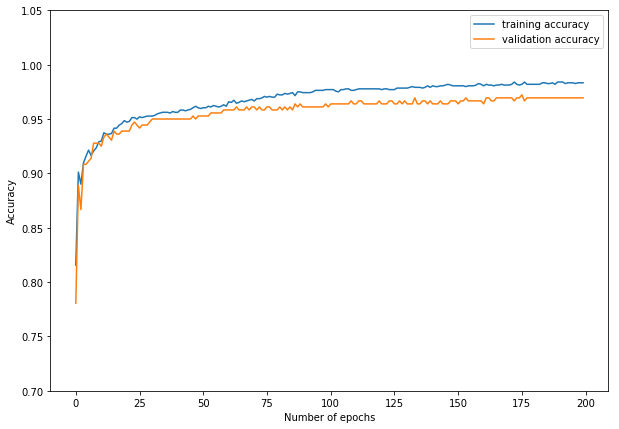

In [41]:
# plot the accuracies against the epochs
arr_epochs = np.arange(0,200,1)
plt.figure(figsize = (10,7))
plt.ylim(0.7,1.05)
plt.plot(arr_epochs, acc_trains, label = 'training accuracy')
plt.plot(arr_epochs, acc_vals, label = "validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()

In [42]:
sg(tf.get_default_graph())

### Part 2.2

In [55]:
# Define hyperparameters and input size
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)
n_inputs = 64  
n_hidden1 = 300
n_hidden2 = 200
n_hidden3 = 100
n_outputs = 10

In [56]:
# Reset graph
tf.reset_default_graph()

In [57]:
# Placeholders for data (inputs and targets)
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")
keep_prob = tf.placeholder(tf.float32,shape=(None))

In [58]:
# Define neuron layers (ReLU in hidden layers)
# We'll take care of Softmax for output with loss function

def neuron_layer(X, n_neurons, name, activation=None):
    # X input to neuron
    # number of neurons for the layer
    # name of layer
    # pass in eventual activation function
    
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        
        # initialize weights to prevent vanishing / exploding gradients
        stddev = 2 / np.sqrt(n_inputs)
        # what is this for?
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        
        # Initialize weights for the layer
        W = tf.Variable(init, name="weights")
        # biases
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        
        # Output from every neuron
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [59]:
# Define the hidden layers
# is_training = tf.placeholder(tf.bool, shape=(), name = "is_training")
# keep_prob = 0.9
# define the drop out ratio
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",activation=tf.nn.tanh)
    dropout1 = tf.nn.dropout(x = hidden1, keep_prob = keep_prob)
    hidden2 = neuron_layer(dropout1, n_hidden2, name="hidden2",\
                           activation=tf.nn.tanh)
    dropout2 = tf.nn.dropout(x = hidden2, keep_prob = keep_prob)
    hidden3 = neuron_layer(dropout2, n_hidden3, name="hidden3",\
                           activation=tf.nn.tanh)
    dropout3 = tf.nn.dropout(x = hidden3, keep_prob = keep_prob)
    logits = neuron_layer(dropout3, n_outputs, name="outputs")

In [60]:
# Define loss function (that also optimizes Softmax for output):

with tf.name_scope("loss"):
    # logits are from the last output of the dnn
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [61]:
# Training step with Gradient Descent

learning_rate = 0.001

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [62]:
# Evaluation to see accuracy

with tf.name_scope("eval"):
#     what is this for
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

### train step

In [63]:
train_writer2 = tf.summary.FileWriter('logs/train2', sess.graph)
test_writer2 = tf.summary.FileWriter('logs/test2')
merged = tf.summary.merge_all()

In [64]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

epochs = 1000
batch_size = 100
acc_trains2 = []
acc_vals2 = []
n_outputs = 10
with tf.Session() as sess:
    init.run()
#     why here works, but the upper one does not.

    
    for epoch in range(epochs):
    #     get the number of iterations
        iterations = x_train.shape[0] // batch_size
    #         get the batches
        x_batches, y_batches = new_batch(batch_size, x_train, y_train, iterations)

        for i in range(iterations):
            # get batches of training data
            # we don't show everything to the network at once
            # what is the batch here?
            x_batch, y_batch = x_batches[i], y_batches[i]
        #         print(batch_xs)
#                 print(x_batch.shape, y_batch.shape)
#           define the drop out ratio
            sess.run(training_op, feed_dict={X: x_batch, y: y_batch, keep_prob: 0.9})
        acc_train = accuracy.eval(feed_dict={X: x_train, y: y_train, keep_prob: 1.0})
        acc_val = accuracy.eval(feed_dict={X: x_test, y: y_test, keep_prob: 1.0})    
#         print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)
#      tensor board
        train_summary = tf.Summary()
        train_summary.value.add(tag='Training accuracy', simple_value=acc_train)
        train_writer2.add_summary(train_summary, epoch)
        train_writer2.flush()
        test_summary = tf.Summary()
        test_summary.value.add(tag='Validation accuracy', simple_value=acc_val)
        test_writer2.add_summary(test_summary, epoch)
        test_writer2.flush()

        acc_trains2.append(acc_train)
        acc_vals2.append(acc_val)
    save_path = saver.save(sess, "./my_model_final.ckpt") # save model

### Accuracy plot and the network graph

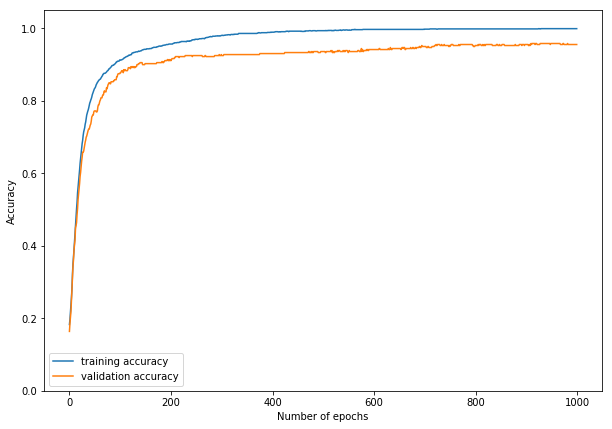

In [65]:
# plot the accuracies against the epochs
arr_epochs = np.arange(0,1000,1)
plt.figure(figsize = (10,7))
plt.ylim(0,1.05)
plt.plot(arr_epochs, acc_trains2, label = 'training accuracy')
plt.plot(arr_epochs, acc_vals2, label = "validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()

In [66]:
sg(tf.get_default_graph())

### Comparison
The Dense Neural Net is much more complicated than the multiclass logistic regression.

The complexity for Dense Neural Net:

weights = 64*300 + 300*200 + 200*100 + 100*10 = 100200

biases = 300 + 200 + 100 + 10 = 710

total = 100910

The complexity for the multiclass logistic regression:

weights = 64*10 = 640

biases = 10

total = 650

## Part 3

## 3.1 

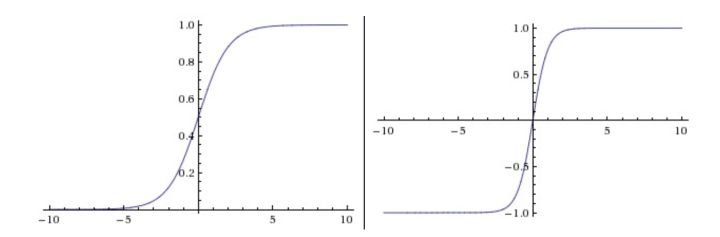

In [49]:
from IPython.display import Image
Image(filename='11.jpg') 

## Neuron Saturation
Neuron saturation means activation functions take on values that are close to the boundaries of this range.

If we use the activation function like Sigmoid or Tanh, when the input value is close to the boundaries, say, 0 or 1(as we see in the figure above), the gradient $\frac{\partial{y_j}}{\partial{x_j}}$ would diminish (near 0) when doing the back propogation. Therefore, if the gradient is very small, the multiplication would be near 0. The moment that happens, the learning process stops and the weights stop updating with the iterations. 

If the network is absolutely correct on all inputs and does not need to change, then saturation would be ok. But if the neurons were wrong, it becomes a big problem. This is especially relevant at initialization.



### Batch normalisation
Batch normalization is a technique for imporving the performance and stability of neural networks, and also makes more sophisticated deep learning architectures work in practice.

The way to do this is to normalise the inputs of each layer so they have a mean output activation of zero and stadnard deviation of one. The method is shown as below:
$$
\mu_{B} = \frac{1}{m}\sum_{i=1}^{m} x_i      \quad mini-batch-mean 
$$
$$
\sigma_{B}^{2} = \frac{1}{m}\sum_{i=1}^{m} (x_i - \mu_{B})^2  \quad mini-batch-variace
$$
$$
\hat{x_i} = \frac{x_i - \mu_{B}}{\sqrt{\sigma_{B}^{2}+\epsilon}}   \quad normalize
$$
$$
y_i = \gamma\sigma_{B}^{2} + \beta = BN_{\gamma,\beta}(x_i)  \quad sacle- and-hift
$$

How does the batch normalization help:

The nature of neural net is to study the data distribution, once the distribution of the training data is different from the test data, then the generality would decreased a lot. Besides, once the distribution of each training batch set is differnt, then the network has to learn it in each iteration, this would greatly slow down the training speed, that's why we need to do the batch normalization.

The neural net training is a very complicated process. Minor change in the first few layers can accumulate in the next few layers and magnify a lot. For example, the coefficents in the first layer keep changing during the process, the coefficients in the second layer would definitly change with the change of the first layer. So what the batch normalization does it to normalize the output of former layer then make them as the input of next layer.

The advantages of the batch normalization can be concluded as follows:
1. A large learning rate can be chosen, which would speed up the training process.

2. We don't needto deal with the drop out and L1 or L2 regularization. Or we can choose smaller regularization strength.

3. Make weights easier to initialize.  Batch normalisation helps reduce the sensitivity to the initial starting weights.

4. Make more activation functions viable. For example, Sigmoid function loses gradient quickly, which means it can’t be used in deep networks, and ReLU often dies out during training. Batch normalization regulates the values going into each activation function, nonlinearities that don't work well in deep networks tend to become viable again.

## 3.2

## Activation function
Activation functions are really important for a Artificial Neural Network to learn and make sense of something really complicated and Non-linear complex functional mappings between the inputs and response variable.

It introduces non-linear properties to the network. The main purpose is to convert an input signal of a node in a A-NN to an output signal. That output signal now is used as a input in the next layer in the stack.

If we don't apply an activation function then the output signal would be a simple linear function. A linear equation is easy to solve but they are limited in their complexity and have less power to learn complex functional mappings from data.

Now that we need a Neural Network to learn and represent almost anything and any arbitray complex funtion which amps inputs to outputs. Hence using a non-linear activation we are able to generate non-linear mappings from inputs to outputs

### Sigmoid 
$$
f(x) = \frac{1}{1+e^{(-x)}}
$$
The range of the function is between 0 and 1. It is a S-shaped curve as shown curve.

1. vanishing gradient problem
2. the output is not zero centered. It makes the gradient updates go too far in different directions
3. saturating and kill gradient
4. small convergent rate



### Tanh
$$
f(x) = \frac{e^{(x)} - e^{(-x)}}{e^{(x)}+e^{(-x)}}
$$

1. output centers at 0, ranging between -1 and 1.
2. Having stronger gradients
3. Avoding bias with those gradients

### Relu
$$
f(x) = max(0,x)
$$

1. simple and efficient
2. reduced likelihood of the gradient to vanish
3. sparsity arises when x <= 0
4. it should only be used with hidden layer of the neural network model
5. somtimes ReLu could result in Dead Neurons.

## Part 3.3 Batch Normalization

In [90]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)
n_inputs = 64  # MNIST
n_hidden1 = 300
n_hidden2 = 200
n_hidden3 = 100
n_outputs = 10

In [91]:
# Reset graph
tf.reset_default_graph()
# Placeholders for data (inputs and targets)
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")
keep_prob = tf.placeholder(tf.float32,shape=(None))

In [92]:
# Define neuron layers (tanh in hidden layers)
# We'll take care of Softmax for output with loss function

def neuron_layer_bn(X, n_neurons, name, activation=None, epsilon = 0.001):
    # X input to neuron
    # number of neurons for the layer
    # name of layer
    # pass in eventual activation function
    
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        
        # initialize weights to prevent vanishing / exploding gradients
        stddev = 2 / np.sqrt(n_inputs)
        # what is this for?
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        
        # Initialize weights for the layer
        W = tf.Variable(init, name="weights")
        # biases
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        
         # Output from every neuron
        Z = tf.matmul(X, W) + b
        # batch normalization
#         so what we normalize is the every batch?
        mean, var = tf.nn.moments(Z,[0])
        scale = tf.Variable(tf.ones(n_neurons))
        beta = tf.Variable(tf.zeros(n_neurons))
        BN = tf.nn.batch_normalization(Z,mean,var,beta,scale,epsilon)
        
       
        if activation is not None:
            return activation(BN)
        else:
            return BN

In [93]:

# Define the hidden layers
# is_training = tf.placeholder(tf.bool, shape=(), name = "is_training")
# keep_prob = 0.9
# define the drop out ratio
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",activation=tf.nn.tanh)
    dropout1 = tf.nn.dropout(x = hidden1, keep_prob = keep_prob)
    hidden2 = neuron_layer(dropout1, n_hidden2, name="hidden2",\
                           activation=tf.nn.tanh)
    dropout2 = tf.nn.dropout(x = hidden2, keep_prob = keep_prob)
    hidden3 = neuron_layer(dropout2, n_hidden3, name="hidden3",\
                           activation=tf.nn.tanh)
    dropout3 = tf.nn.dropout(x = hidden3, keep_prob = keep_prob)
    logits = neuron_layer(dropout3, n_outputs, name="outputs")



In [94]:
# Define loss function (that also optimizes Softmax for output):

with tf.name_scope("loss"):
    # logits are from the last output of the dnn
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    tf.summary.scalar('loss', loss)
    # Training step with Gradient Descent

learning_rate = 0.001

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
#     what is this for
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    tf.summary.scalar('accuracy', accuracy)

### train step

In [95]:
# merged = tf.summary.merge_all()
train_writer3 = tf.summary.FileWriter('logs/train3', sess.graph)
test_writer3 = tf.summary.FileWriter('logs/test3')
loss_writer3 = tf.summary.FileWriter('logs/loss3')
merged = tf.summary.merge_all()

In [96]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

epochs2 = 2000
batch_size = 100
acc_trains3 = []
acc_vals3 = []
n_outputs = 10
with tf.Session() as sess:
    init.run()
#     why here works, but the upper one does not.

    
    for epoch in range(epochs2):
    #     get the number of iterations
        iterations = x_train.shape[0] // batch_size
    #         get the batches
        x_batches, y_batches = new_batch(batch_size, x_train, y_train, iterations)

        for i in range(iterations):
            # get batches of training data
            # we don't show everything to the network at once
            # what is the batch here?
            x_batch, y_batch = x_batches[i], y_batches[i]
        #         print(batch_xs)
#                 print(x_batch.shape, y_batch.shape)
#           define the drop out ratio
            sess.run(training_op, feed_dict={X: x_batch, y: y_batch, keep_prob: 0.9})
        acc_train = accuracy.eval(feed_dict={X: x_train, y: y_train, keep_prob: 1.0})
        acc_val = accuracy.eval(feed_dict={X: x_test, y: y_test, keep_prob: 1.0})    
#         print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)
        acc_trains3.append(acc_train)
        acc_vals3.append(acc_val)
#      tensor board
        train_summary = tf.Summary()
        train_summary.value.add(tag='Training accuracy', simple_value=acc_train)
        train_writer3.add_summary(train_summary, epoch)
        train_writer3.flush()
        test_summary = tf.Summary()
        test_summary.value.add(tag='Validation accuracy', simple_value=acc_val)
        test_writer3.add_summary(test_summary, epoch)
        test_writer3.flush()
        
        if epoch % 50 == 0:
#             summary1 = summaryOps.scalarSummary('loss', loss)
            train_loss,_ = sess.run([merged,training_op], feed_dict={X: x_train, y: y_train, keep_prob: 1})
            loss_writer3.add_summary(train_loss, epoch)
            loss_writer3.flush()
        
    save_path = saver.save(sess, "./my_model_final.ckpt") # save model

### Accuracy plot and the network graph

In [ ]:
# plot the accuracies against the epochs
arr_epochs = np.arange(0,2000,50)
# print(type(arr_epochs))
# change to array
arr_acc_train = np.asarray(acc_trains3)
arr_acc_vals = np.asarray(acc_vals3)

arr_acc_train50 = arr_acc_train[arr_epochs]
arr_acc_vals50 = arr_acc_vals[arr_epochs]
plt.figure(figsize = (10,7))
plt.ylim(0,1.05)
plt.plot(arr_epochs, arr_acc_train50, label = 'training accuracy')
plt.plot(arr_epochs, arr_acc_vals50, label = "validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()

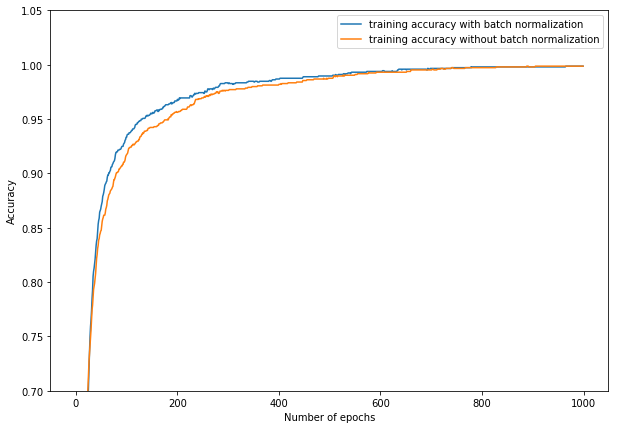

In [64]:
# plot the accuracies against the epochs
arr_epochs = np.arange(0,1000,1)
# print(type(arr_epochs))
# change to array
arr_acc_train = np.asarray(acc_trains3)
arr_acc_vals = np.asarray(acc_vals3)

arr_acc_train50 = arr_acc_train[arr_epochs]
arr_acc_vals50 = arr_acc_vals[arr_epochs]
plt.figure(figsize = (10,7))
plt.ylim(0.7,1.05)
plt.plot(arr_epochs, arr_acc_train50, label = 'training accuracy with batch normalization')
# plt.plot(arr_epochs, arr_acc_vals50, label = "validation accuracy")
plt.plot(arr_epochs, acc_trains2, label = "training accuracy without batch normalization")
# plt.plot(arr_epochs, acc_vals2, label = "validation accuracy without batch normalization")

plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()

### Conclusion
As we see from the plot above, the method with batch normalization achieve higher accuarcy in terms of both training and test accuracy. The training rate is also faster.